In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
if True:
    df2 = pd.read_csv("bunny_fit_week2-4.log",names=['k','init','model','l','i'])
    mdf2 = df2.groupby(['init','model','k']).mean()
    sdf2 = df2.groupby(['init','model','k']).std()

In [29]:
df = pd.read_csv("bunny_fit_week2-4r4.log",names=['k','init','model','l','i'])
mdf = df.groupby(['init','model','k']).mean()
sdf = df.groupby(['init','model','k']).std()

(8,) (8,)
(8,) (8,)
(8,) (8,)
(8,) (8,)
(8,) (8,)
(8,) (8,)
(8,) (8,)
(8,) (8,)


/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


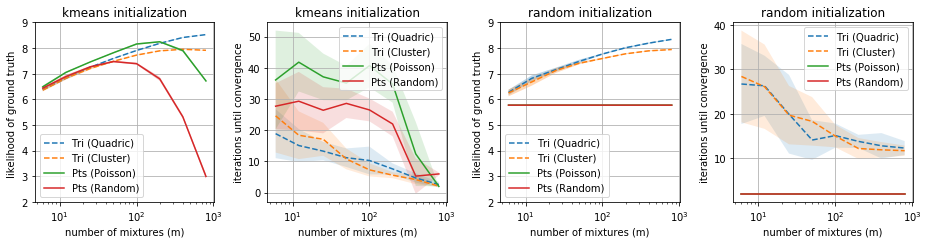

In [32]:
fig = plt.figure(figsize=(13,3.5))
for ii, init in enumerate(['kmeans','random']):
    for model in range(4):
        ls = '--' if model < 2 else '-'
        if model == 0:
            label = 'Tri (Quadric)'
        if model == 1:
            label = 'Tri (Cluster)'
        if model == 2:
            label = 'Pts (Poisson)'
        if model == 3:
            label = 'Pts (Random)'
        if init == 'kmeans':
            x = np.array(mdf2.loc[('kmeans',0),].index)
            y = mdf2.loc[(init,model),].values[:,0]
            error = sdf2.loc[(init,model),].values[:,0]
        else:
            x = np.array(mdf.loc[('random',0),].index)

            y = mdf.loc[(init,model),].values[:,0]
            error = sdf.loc[(init,model),].values[:,0]

        ax = plt.subplot(1,4,1+ii*2)
        #print(x.shape,y.shape)

        plt.plot(x,y,ls=ls,label=label)
        plt.fill_between(x, y-error, y+error,alpha=0.3)
        plt.grid(True)
        plt.xlabel('number of mixtures (m)')
        plt.title('{} initialization'.format(init))
        plt.ylabel('likelihood of ground truth ')
        plt.ylim(2,9)
        ax.set_xscale("log", nonposx='clip')


        if init == 'kmeans':
            y = mdf2.loc[(init,model),].values[:,1]
            error = sdf2.loc[(init,model),].values[:,1]
        else:
            #x = np.array(mdf.loc[('random',0),].index)

            #x = np.array(mdf.index)
            y = mdf.loc[(init,model),].values[:,1]
            error = sdf.loc[(init,model),].values[:,1]
        ax = plt.subplot(1,4,2+ii*2)
        print(x.shape,y.shape)
        plt.plot(x,y,ls=ls,label=label)
        plt.fill_between(x, y-error, y+error,alpha=0.15)

        ax.set_xscale("log", nonposx='clip')
        plt.grid(True)
        plt.xlabel('number of mixtures (m)')
        plt.title('{} initialization'.format(init))
        plt.ylabel('iterations until convergence')
        #plt.subplot(2,2,3)
        #plt.subplot(2,2,4)
for i in range(4):
    plt.subplot(1,4,1+i)
    plt.legend()
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.tight_layout()
plt.savefig('graphs-week3.pdf')

In [14]:
mdf2.loc[('kmeans',0),].values, np.array(mdf2.loc[('kmeans',0),].index)

(array([[ 6.37647908, 18.9       ],
        [ 6.82620463, 15.1       ],
        [ 7.2518957 , 13.3       ],
        [ 7.59605786, 11.2       ],
        [ 7.90551906, 10.3       ],
        [ 8.18309743,  7.6       ],
        [ 8.41164864,  4.7       ],
        [ 8.52432871,  2.6       ]]),
 array([('kmeans', 0, 6), ('kmeans', 0, 12), ('kmeans', 0, 25),
        ('kmeans', 0, 50), ('kmeans', 0, 100), ('kmeans', 0, 200),
        ('kmeans', 0, 400), ('kmeans', 0, 800), ('kmeans', 1, 6),
        ('kmeans', 1, 12), ('kmeans', 1, 25), ('kmeans', 1, 50),
        ('kmeans', 1, 100), ('kmeans', 1, 200), ('kmeans', 1, 400),
        ('kmeans', 1, 800), ('kmeans', 2, 6), ('kmeans', 2, 12),
        ('kmeans', 2, 25), ('kmeans', 2, 50), ('kmeans', 2, 100),
        ('kmeans', 2, 200), ('kmeans', 2, 400), ('kmeans', 2, 800),
        ('kmeans', 3, 6), ('kmeans', 3, 12), ('kmeans', 3, 25),
        ('kmeans', 3, 50), ('kmeans', 3, 100), ('kmeans', 3, 200),
        ('kmeans', 3, 400), ('kmeans', 3, 800)], d

In [10]:
mdf2,mdf

(                         l     i
 init   model k                  
 kmeans 0     6    6.376479  18.9
              12   6.826205  15.1
              25   7.251896  13.3
              50   7.596058  11.2
              100  7.905519  10.3
              200  8.183097   7.6
              400  8.411649   4.7
              800  8.524329   2.6
        1     6    6.359966  24.6
              12   6.825689  18.4
              25   7.206386  17.1
              50   7.484648  10.8
              100  7.726116   7.3
              200  7.891712   5.6
              400  7.951999   4.2
              800  7.912779   2.1
        2     6    6.488048  36.1
              12   7.050624  41.8
              25   7.459890  37.1
              50   7.817852  35.1
              100  8.158376  40.7
              200  8.245303  34.8
              400  7.901341  12.4
              800  6.718373   2.0
        3     6    6.437140  27.7
              12   6.889952  29.3
              25   7.270930  26.4
              